<a href="https://colab.research.google.com/github/Anxile/Paloma_LLM/blob/main/Advanced_Notebook_for_Dating_Matches_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rabieelkharoua_predict_online_dating_matches_dataset_path = kagglehub.dataset_download('rabieelkharoua/predict-online-dating-matches-dataset')

print('Data source import complete.')


Data source import complete.


In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-online-dating-matches-dataset/Online_Dating_Behavior_Dataset.csv


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
          text-align: center; font-size:250%;border-radius:20px 80px;">Online Dating Matches Prediction</p>

![My Image](https://storage.googleapis.com/kaggle-datasets-images/5250700/8744629/fa737d29cb27e064e63d09bb83b6bbb9/dataset-cover.jpg?t=2024-06-21-07-43-54)

<b>🙋‍♂️🙋‍♀️ Hi all !!! We are going to work with Online Dating Matches Dataset, If you like this notebook then plz consider a upvote for me 😎😎

<a id=""></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">📋 TABLE OF CONTENTS</p>

* [1. Importing Libraries](#1)
    
* [2. Meta information of dataframe](#2)
    
* [3.Missing values.](#3)

* [3.1 Duplicated rows.](#3.1)
    
* [4.Statistical information of Dataframe](#4)

* [5.Visualize correlation of independent features and check multicolinarity problems](#5)
    
* [6. EDA & Visualization](#6)

    * [6.1. Numerical EDA](#6.1)
    
    * [6.2. Categorical EDA](#6.2)
        
    
* [7. 🏍Feature Engineering](#7)

    * [7.1.🏍Normalized skewed col](#7.1)
    
    * [7.1.🏍Outliers detection and removed](#7.2)
    
    * [7.2.🏍Train test split](#7.3)
       
    * [7.3. Scaling Features](#7.4)
       
    

* [8. Create & Train Model](#8)

* [9. Models Score](#9)

* [10. Visualize Models Score](#10)




<a id=""></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;"> 🚢Data Story</p>

<b>Data:<b/>
    
The Dataset provides a comprehensive view into the dynamics of online matchmaking interactions. It captures essential variables that influence the likelihood of successful matches across different genders. This dataset allows researchers and analysts to explore how factors such as VIP subscription status, income levels, parental status, age, and self-perceived attractiveness contribute to the outcomes of online dating endeavors.

<b>Variables:<b/>
    
1. Gender: 0 (Male), 1 (Female)
    
2. PurchasedVIP: 0 (No), 1 (Yes)
    
3. Income: Annual income in USD
    
4. Children: Number of children
    
5. Age: Age of the user
    
6. Attractiveness: Subjective rating of attractiveness (1-10)
    
7. Matches: Number of matches obtained based on criteria
    
<b>Target Variable:<b/>
    
Matches: Number of matches received, indicative of success rate in online dating
    

<a id="1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🎰 Importing Libraries</p>

In [27]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools


%matplotlib inline

In [28]:
#Load the dataset and check the data head.
df=pd.read_csv("/content/Online_Dating_Behavior_Dataset.csv")
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


<a id="2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📝 Meta information
    about Dataframe</p>

In [29]:
#check the rows and columns number.
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 1000 and number of columns:--> 7


In [30]:
df.columns

Index(['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness',
       'Matches'],
      dtype='object')

In [31]:
#chack the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


<a id="3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🛒Missing values </p>

In [32]:
#check for missing values
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
Gender,0,0.0
PurchasedVIP,0,0.0
Income,0,0.0
Children,0,0.0
Age,0,0.0
Attractiveness,0,0.0
Matches,0,0.0


<b>No missing or Nan values found , great 😁

<a id="3.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🤼‍♀️Duplicated rows </p>

In [33]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 0


<a id="4"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📈 Statistical information of Dataframe </p>

In [34]:
#check data description
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='mako').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Gender,1000.000000,0.510000,0.500150,0.000000,0.000000,1.000000,1.000000,1.000000
PurchasedVIP,1000.000000,0.474000,0.499573,0.000000,0.000000,0.000000,1.000000,1.000000
Income,1000.000000,50988.447000,9889.336141,20786.000000,44358.500000,50841.500000,57396.000000,81931.000000
Children,1000.000000,0.978000,0.997251,0.000000,0.000000,1.000000,2.000000,3.000000
Age,1000.000000,34.616000,9.147799,18.000000,27.000000,35.000000,43.000000,49.000000
Attractiveness,1000.000000,5.624000,2.824288,1.000000,3.000000,6.000000,8.000000,10.000000
Matches,1000.000000,76.050000,52.713150,0.000000,0.000000,70.000000,120.000000,160.000000


In [35]:
#check the correlation between terget and each of columns
df.corr()["Matches"]

,Matches
Gender,0.800911
PurchasedVIP,0.338011
Income,0.007140
Children,0.016435
Age,-0.043462
Attractiveness,0.313557
Matches,1.000000


<a id="5"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:150%;border-radius:20px 80px;">🎰 Visualize correlation of independent features and check multicolinarity problems </p>

<Axes: >

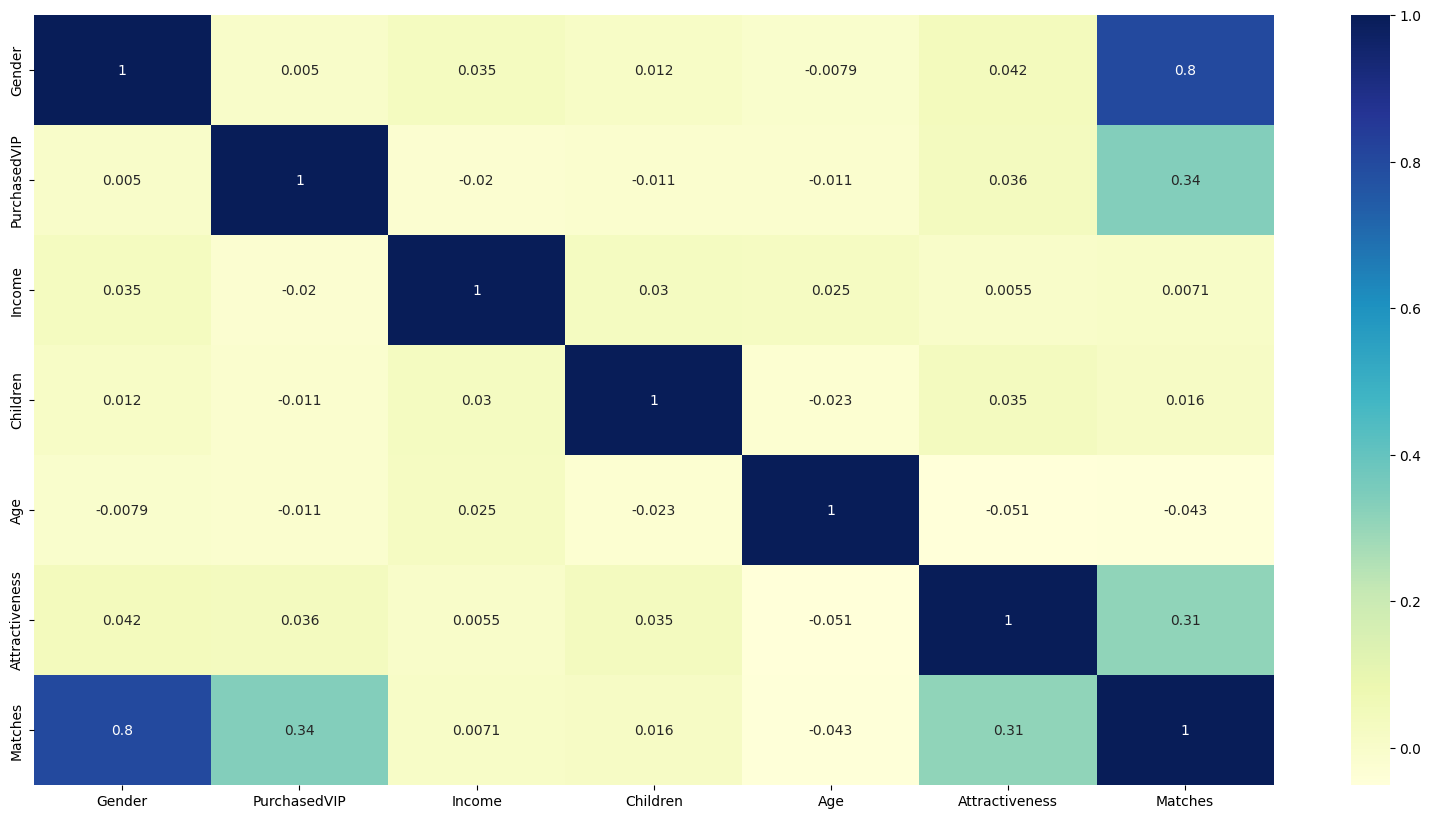

In [36]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linecolor='black')

In [37]:
#with the function we can select highly correlated  independent features
#it will remove the first feature that is correlated with anything other feature
def correlation(df,threshold):
    coll_corr=set() #set of all the names of correlated columns
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr

In [38]:
#calling the fuction
corr_feature = correlation(df.iloc[:,:-1],0.85)
len(set(corr_feature))

0

<b> No highly correlated independent features or no multicolinarity problems 😎

<a id="6"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 EDA & Visualization</p>

<a id="6.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 Numerical columns EDA</p>

In [39]:
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [40]:
numeric_col=["Income","Age","Attractiveness","Matches"]

In [41]:
import plotly.express as px

for col in numeric_col:
    fig = px.histogram(df, x=col, nbins=50, title=f"Histogram of {col}")
    fig.show()


In [42]:
i=1
for col in numeric_col:
    fig = px.box(df, x=col, points="all",template="plotly_dark",width=500,height=250)

    fig.show()

In [43]:
numeric_col_withoutTerget=["Income","Age","Attractiveness"]

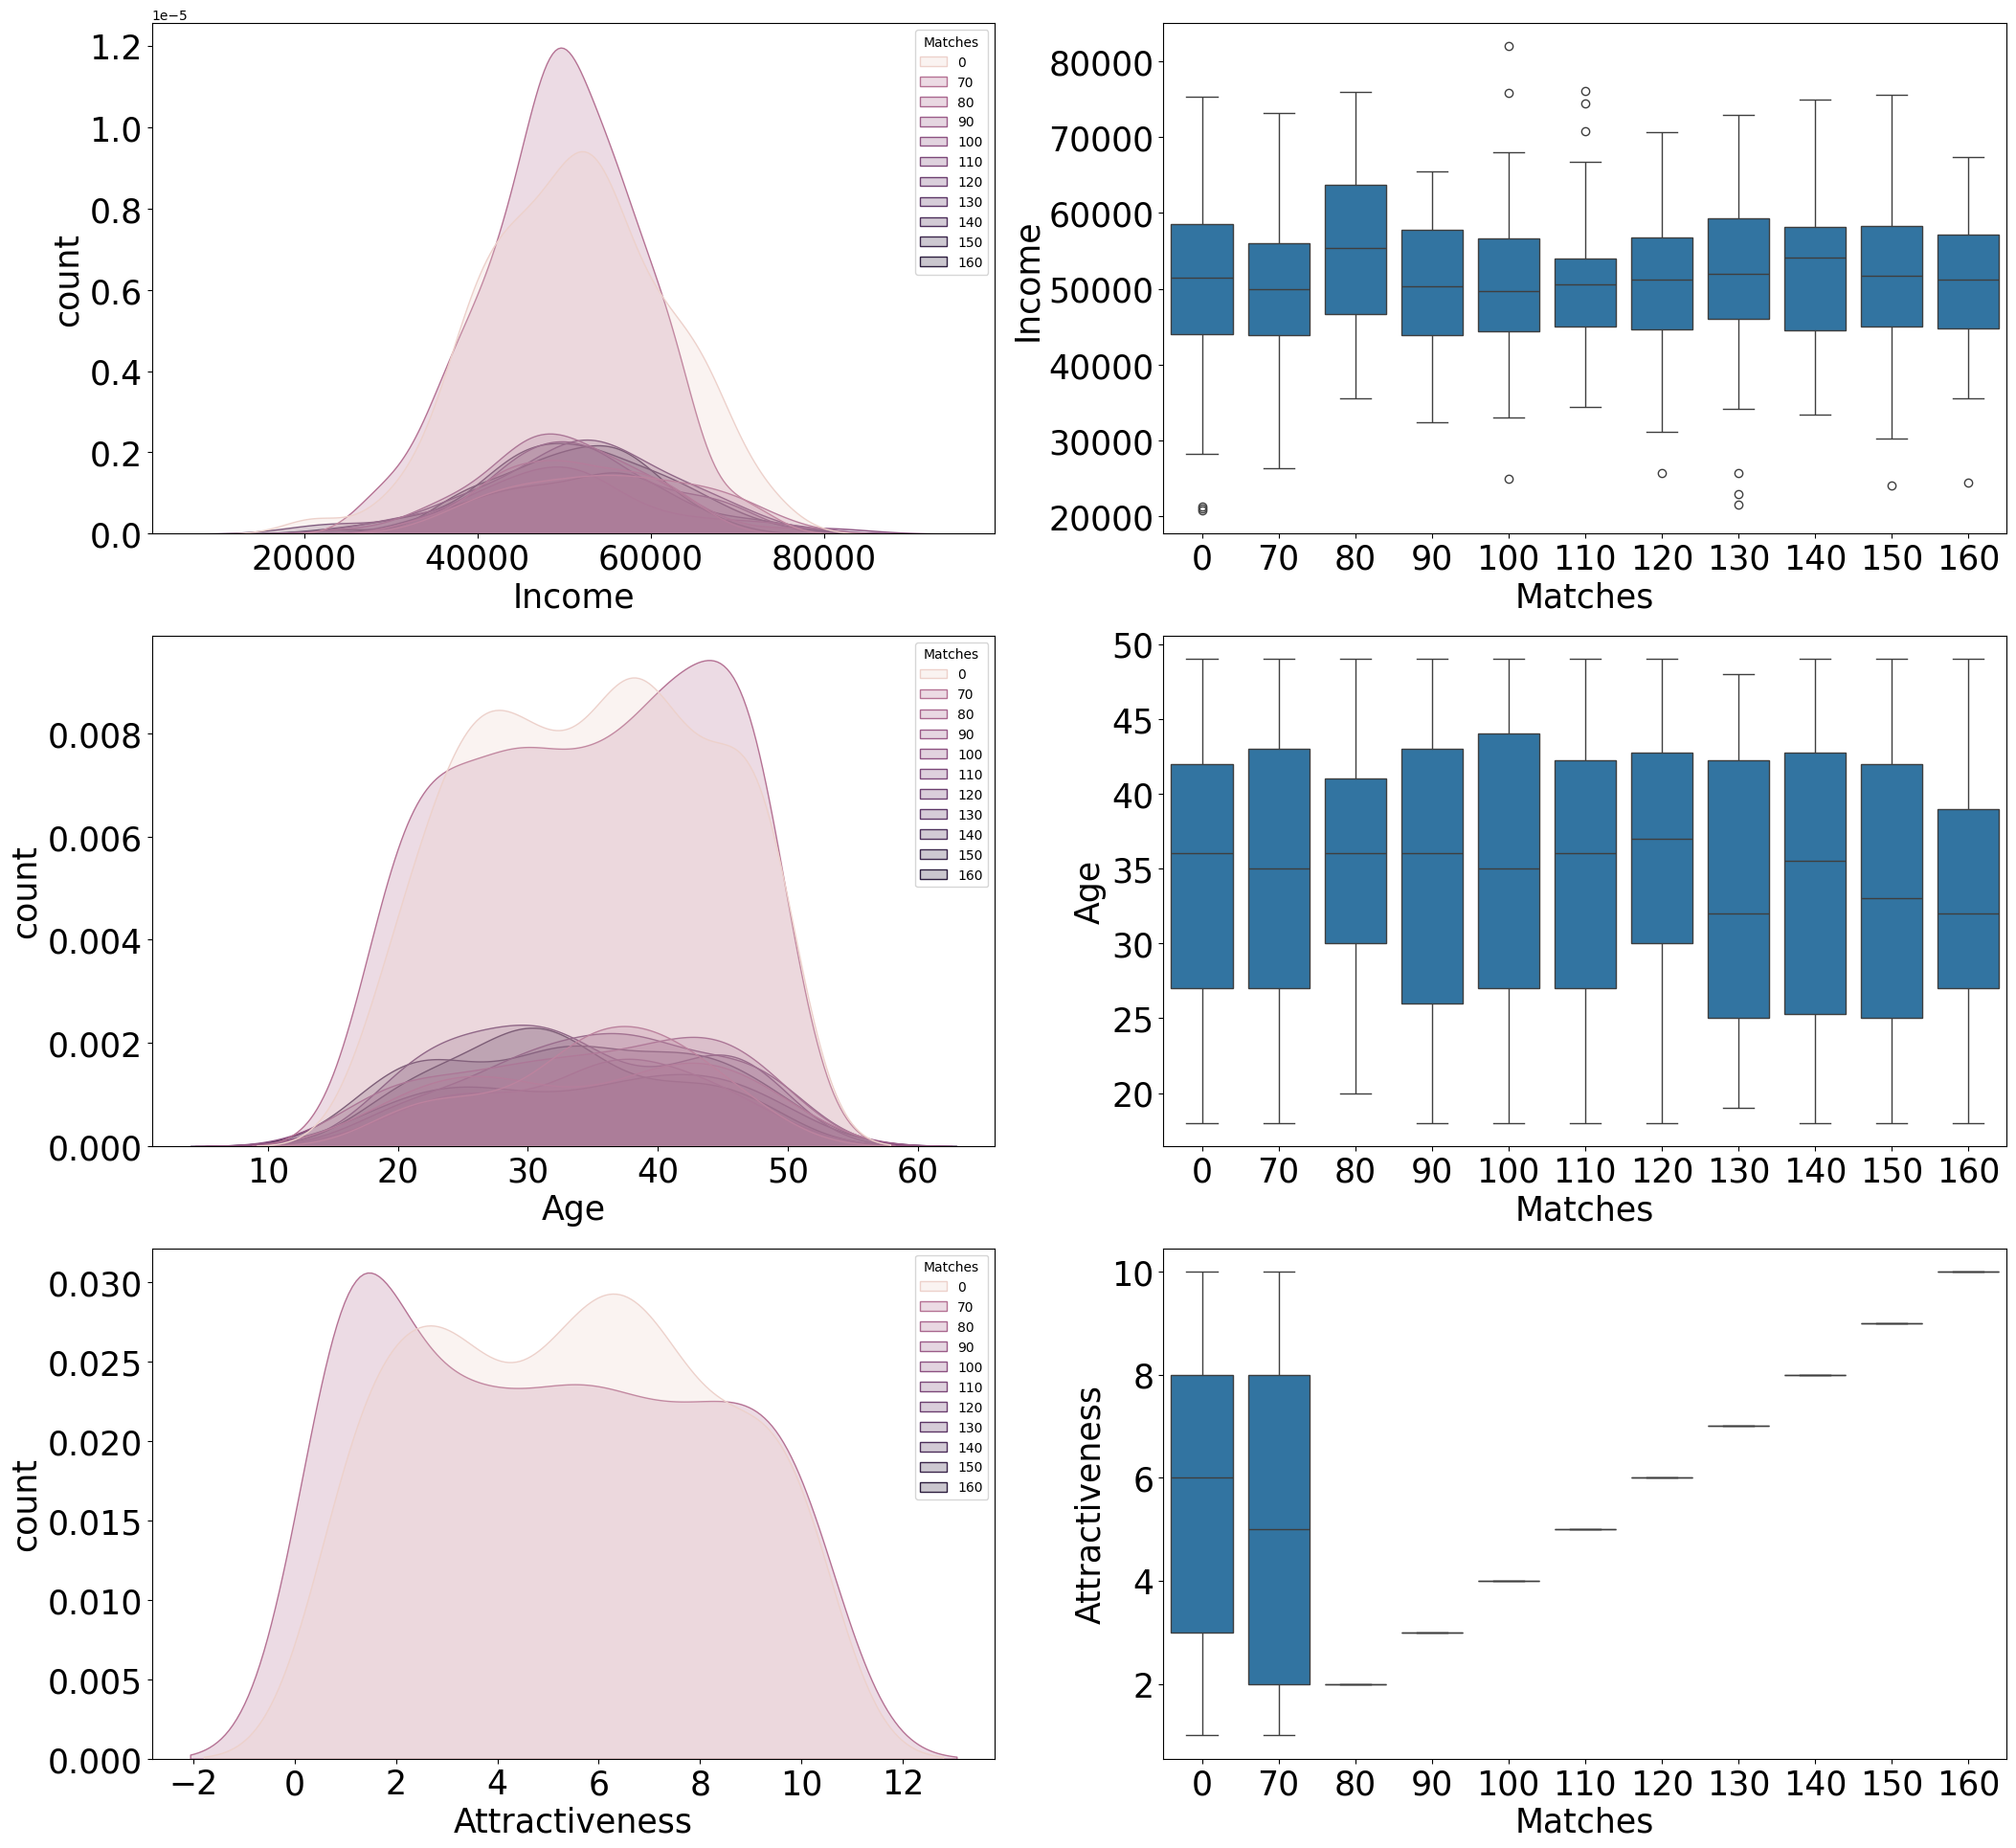

In [44]:


i = 1
plt.figure(figsize=(25, 90))

for col in numeric_col_withoutTerget:
    plt.subplot(11, 2, i)
    sns.kdeplot(data=df, hue="Matches", x=col, fill=True)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col, fontsize=25)
    plt.ylabel("count", fontsize=25)
    i = i + 1

    plt.subplot(11, 2, i)
    sns.boxplot(x="Matches", y=col, data=df)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("Matches", fontsize=25)
    plt.ylabel(col, fontsize=25)
    i = i + 1

plt.show()


<a id="6.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🔥 Categorical columns EDA</p>

In [45]:
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [46]:
encoded_cat=["Gender",'PurchasedVIP','Children']

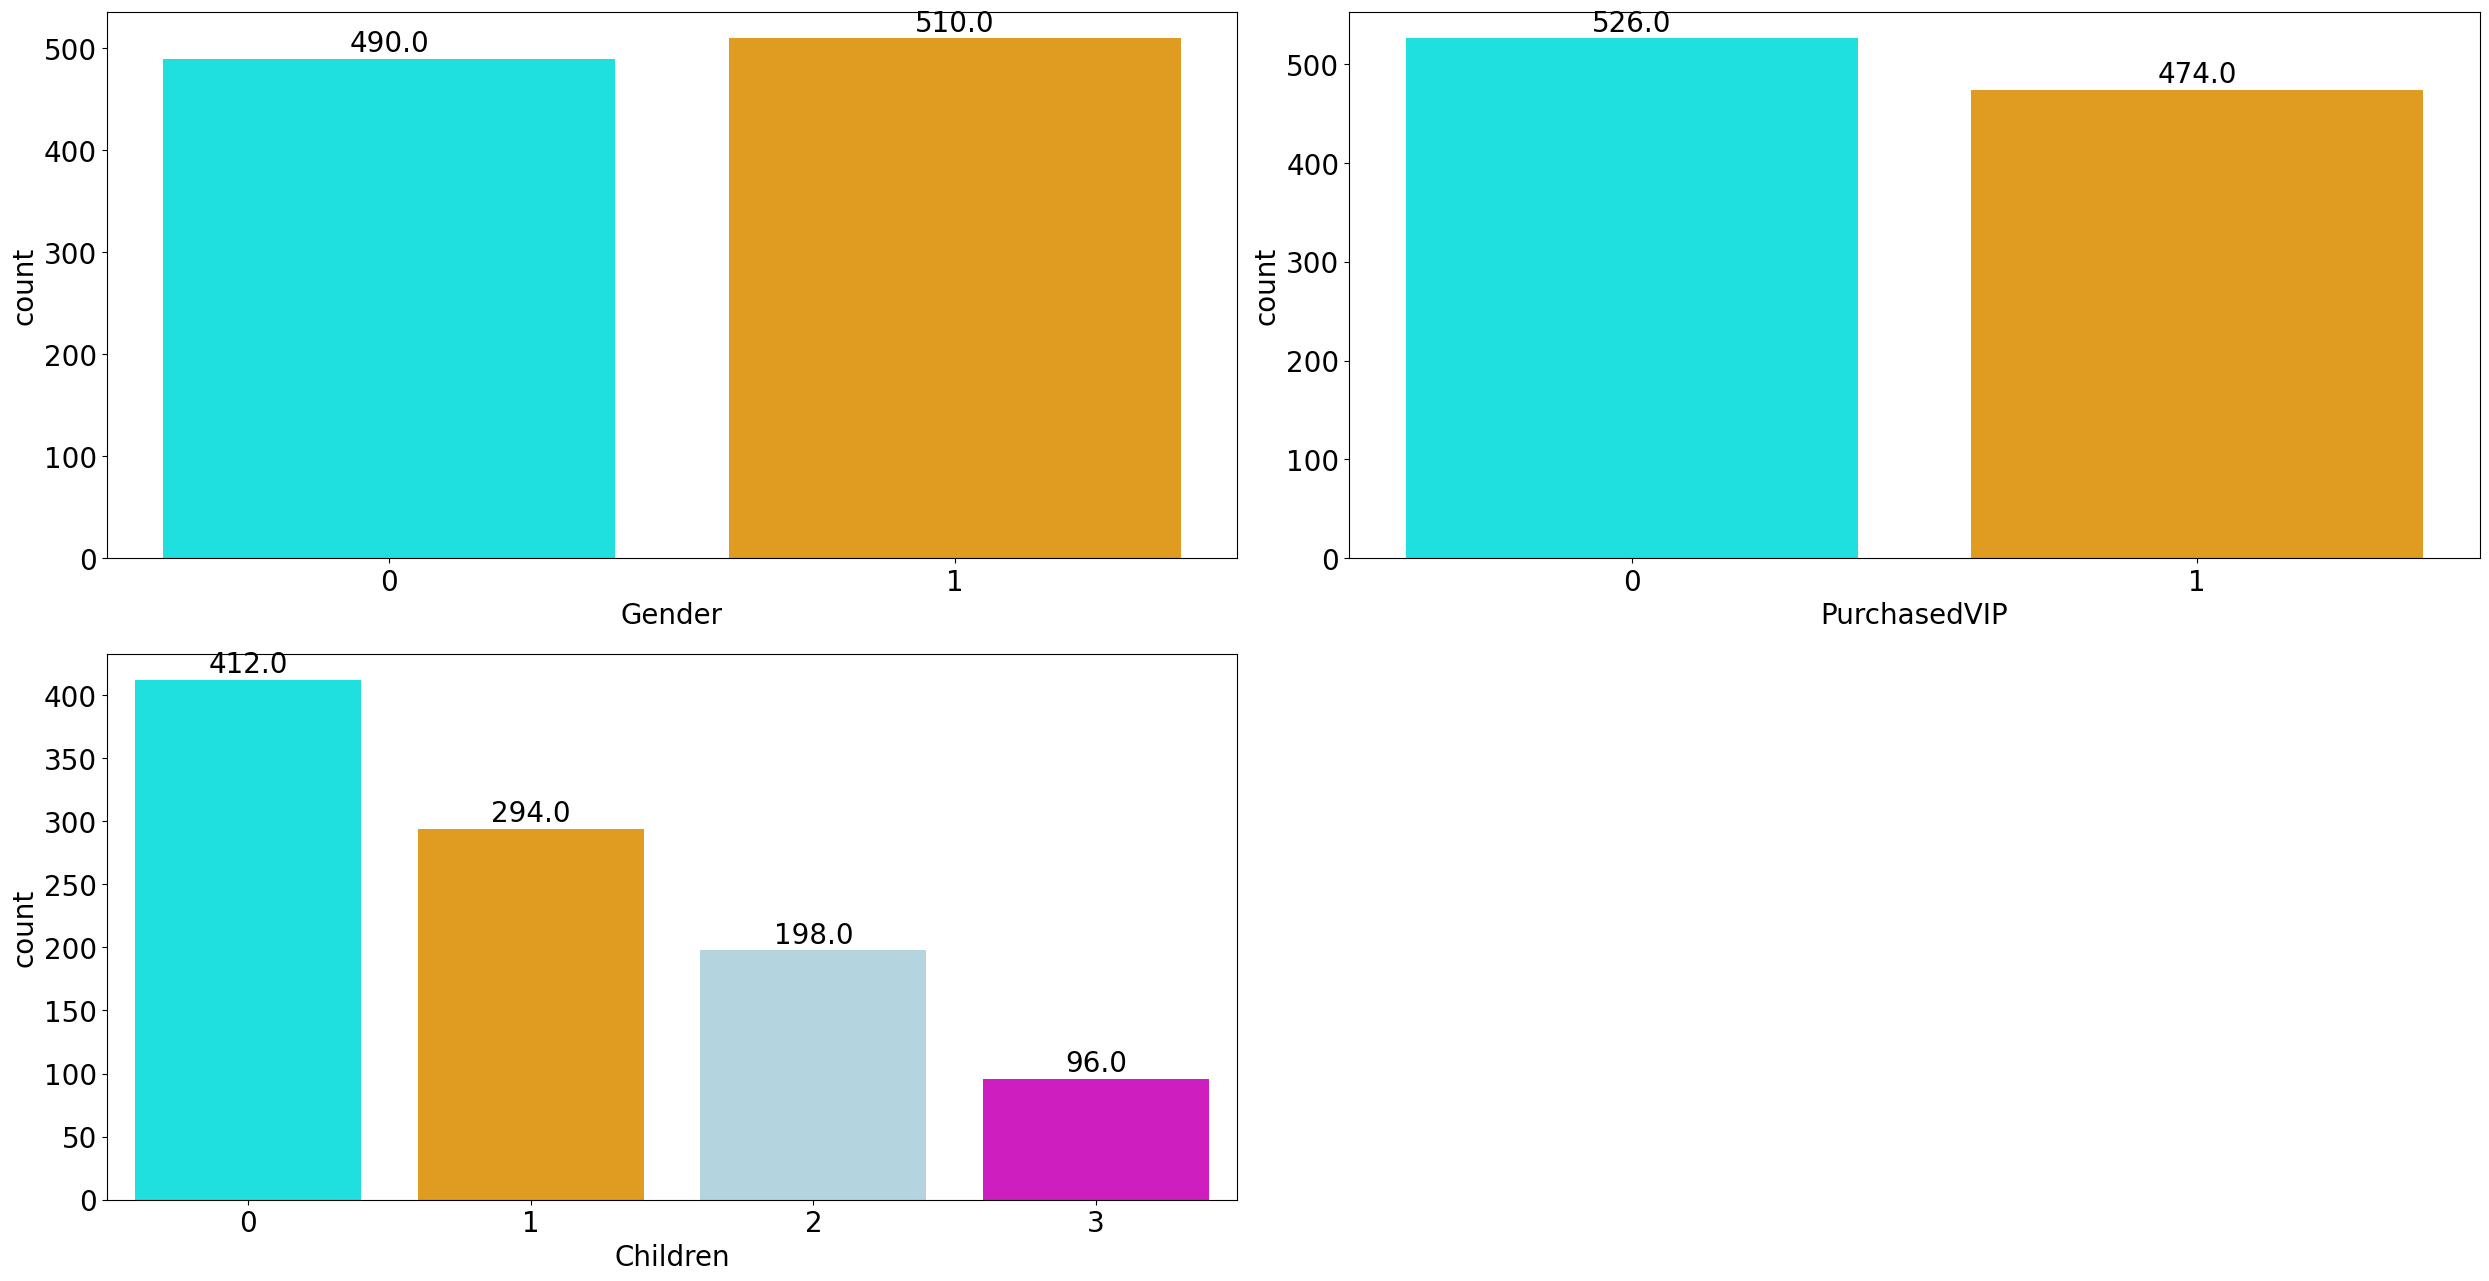

In [47]:
i = 1
colors = ["#00FFFF", "#FFA500", "#ADD8E6", "#ED00D9", "#ED1400"]
textprops = {"fontsize": 22}
plt.figure(figsize=(25, 70))

for col in encoded_cat:
    plt.subplot(11, 2, i)
    ax = sns.countplot(data=df, x=col, palette=colors)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("count", fontsize=20)

    # Adding labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=20, color='black', xytext=(0, 5),
                    textcoords='offset points')

    i = i + 1

plt.tight_layout()
plt.show()



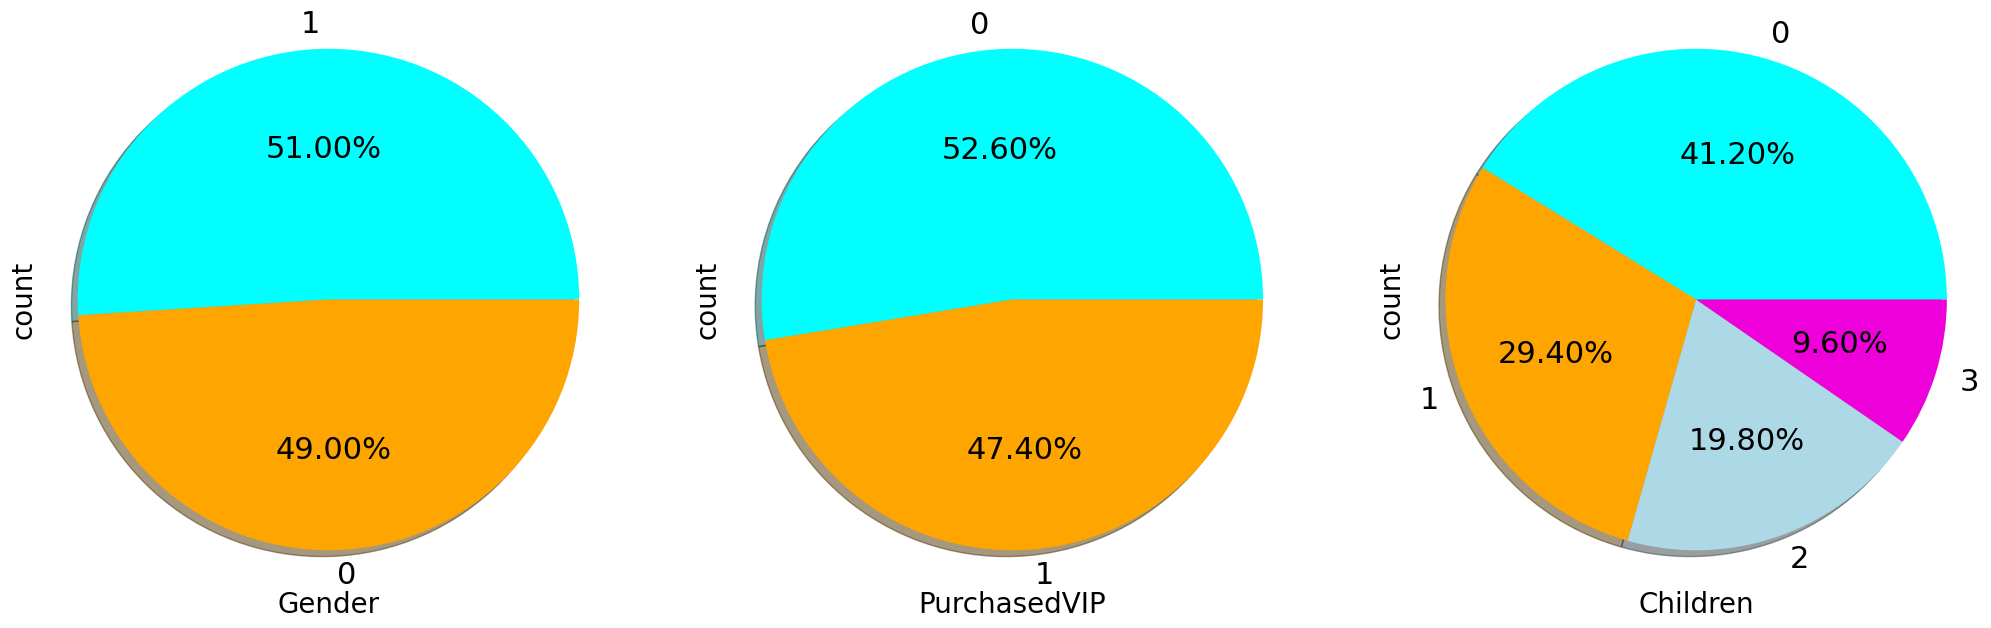

In [48]:
i=1
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}
plt.figure(figsize=(25,120))
for col in encoded_cat:
    plt.subplot(11,3,i)
    df[col].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors,textprops=textprops,shadow=True, radius = 1.1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col,fontsize=20)
    plt.ylabel("count",fontsize=20)
    i=i+1


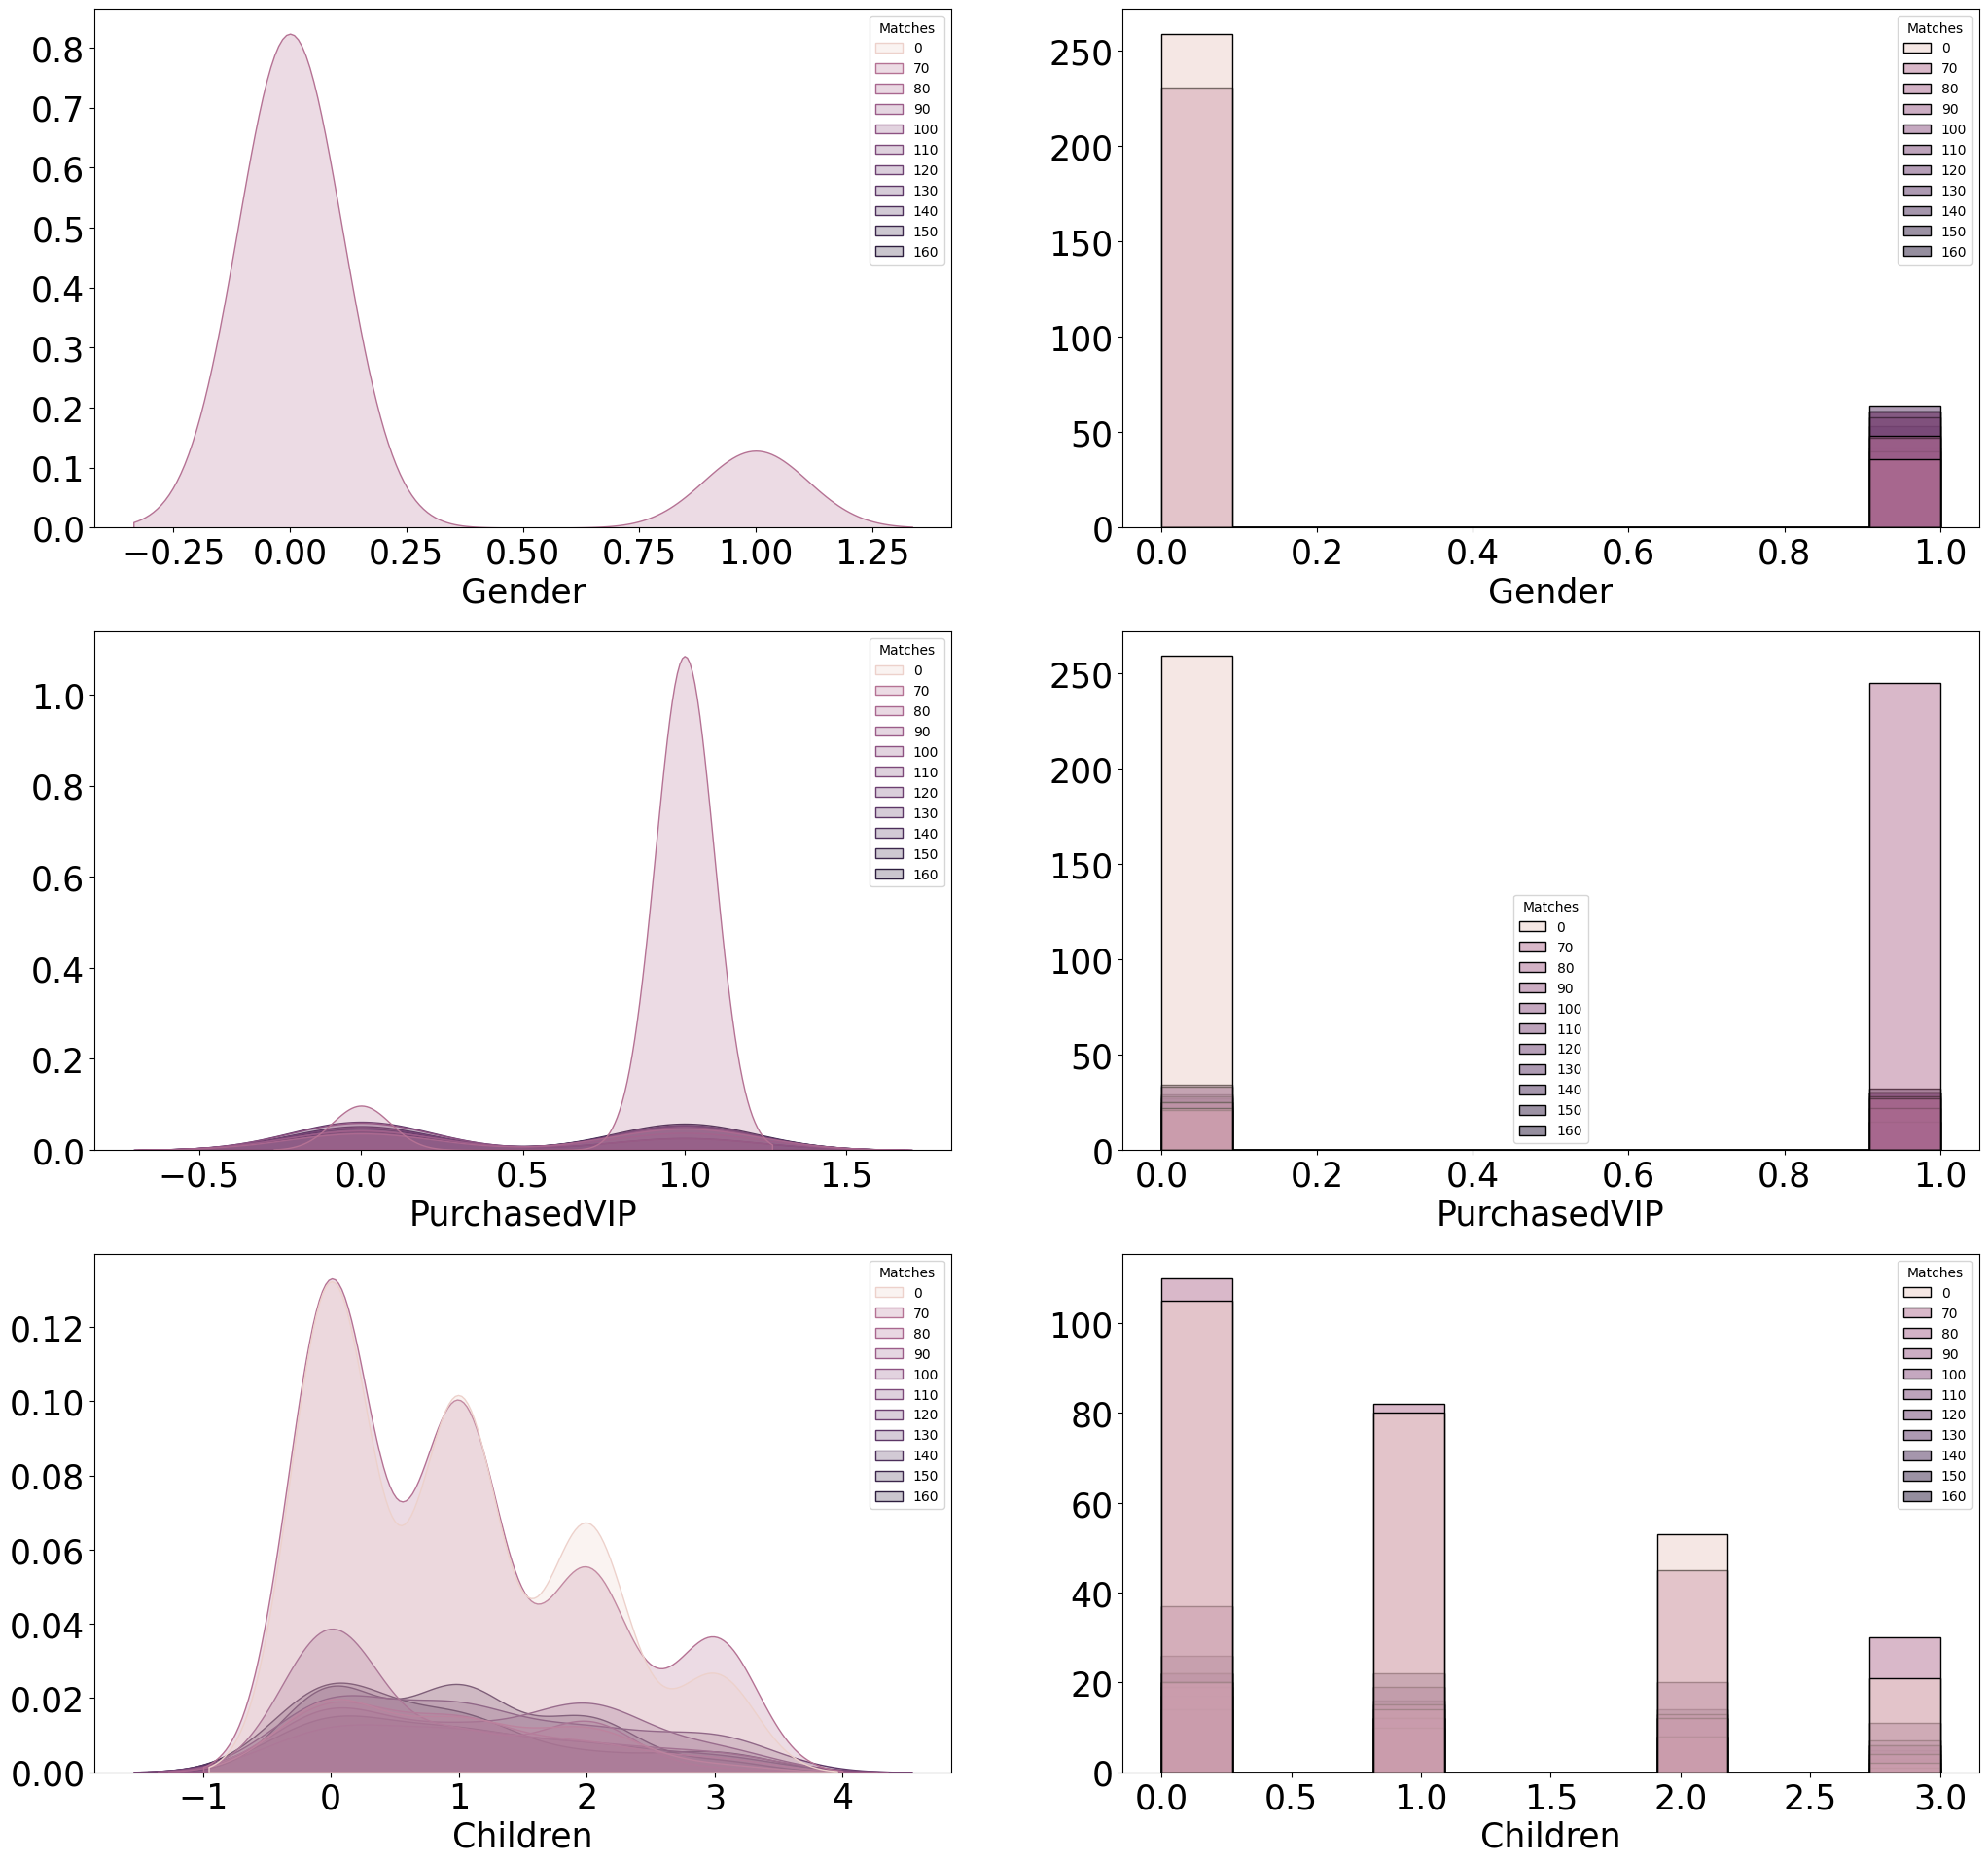

In [49]:
i=1
plt.figure(figsize=(25,90))
for col in encoded_cat:
    plt.subplot(11,2,i)
    sns.kdeplot(data=df,hue="Matches",x=col,shade = "fill")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("",fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    sns.histplot(data=df,hue="Matches",x=col)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("",fontsize=25)
    i=i+1

plt.show()

<a id="7"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🚂Features Engineering</p>

In [50]:
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [51]:
# Get the features and terget columns
X=df.iloc[:,0:-1]
y=df.Matches

In [52]:
X.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
0,0,1,51777,3,47,5
1,1,0,36646,0,42,7
2,0,0,53801,1,25,5
3,0,0,56105,0,35,8
4,0,0,55597,1,36,6


<a id="7.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯Normalized skewed columns </p>

In [53]:
#let find the skewed col and fix them

skew_limit=0.75 # limit for skewed col
skew_vals=X[numeric_col_withoutTerget].skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

#graphically represent the skewed col
i=1
# print("Columns names: ",skew_col.index)
print("\n")
print("Number of Skewed columns:--->>\n",len(skew_col))
plt.figure(figsize=(40,60))
for col in skew_col.index:
    plt.subplot(8,2,i)
    sns.distplot(X[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1


plt.show()



Number of Skewed columns:--->>
 0


<Figure size 4000x6000 with 0 Axes>

<b>No skewed columns found, Great😊

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">👽Outliers detection and removed </p>

In [54]:
# Function to detect outliers in a given data series
def outlier(data):
    mean = data.mean()
    std = data.std()

    # Find the boundaries for outliers
    highest = mean + 3 * std
    lowest = mean - 3 * std

    # Find the outliers
    outliers = data[(data > highest) | (data < lowest)]

    return outliers

# Outliers detection and removal function for specified columns
def detect_and_remove_outliers(df, columns):
    outliers_df = pd.DataFrame()  # DataFrame to store outlier rows
    for col in columns:
        if col in df.columns:
            test = outlier(df[col])
            print("Column name:", col)
            print("Number of outliers:", len(test))
            print("\n")
            outliers_rows = df.loc[test.index]
            print("Outliers rows:")
            print(outliers_rows)
            print("<<<<<<<<<------------------------------------->>>>>>>>>")
            print("\n")
            outliers_df = pd.concat([outliers_df, outliers_rows])

    # Drop outliers from the original DataFrame
    df = df.drop(outliers_df.index, axis=0)

    return df, outliers_df


numeric_cols = ["Income", "Age", "Attractiveness"]
cleaned_df, outliers = detect_and_remove_outliers(X, numeric_cols)



Column name: Income
Number of outliers: 4


Outliers rows:
     Gender  PurchasedVIP  Income  Children  Age  Attractiveness
321       0             0   21037         0   27               7
759       0             0   21277         2   26               9
811       0             0   20786         0   25               5
835       1             1   81931         0   23               4
<<<<<<<<<------------------------------------->>>>>>>>>


Column name: Age
Number of outliers: 0


Outliers rows:
Empty DataFrame
Columns: [Gender, PurchasedVIP, Income, Children, Age, Attractiveness]
Index: []
<<<<<<<<<------------------------------------->>>>>>>>>


Column name: Attractiveness
Number of outliers: 0


Outliers rows:
Empty DataFrame
Columns: [Gender, PurchasedVIP, Income, Children, Age, Attractiveness]
Index: []
<<<<<<<<<------------------------------------->>>>>>>>>




In [55]:
print("outliers are:")
outliers

outliers are:


,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
321,0,0,21037,0,27,7
759,0,0,21277,2,26,9
811,0,0,20786,0,25,5
835,1,1,81931,0,23,4


<b>Outliers are removed from the dataset

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Train test split</p>

In [56]:
#It is a good practise to split the data to avoiding the data leakage
#train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


X_train shape:  (800, 6)
X_test shape:  (200, 6)

Y_train shape:  (800,)
Y_test shape:  (200,)


<a id="7.4"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🤖 Scaling the features</p>

In [57]:
# Using standard scaler
sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
0,0.987577,-0.951190,-0.993861,-0.968627,0.277380,-0.229082
1,0.987577,1.051315,-1.409589,-0.968627,1.613480,-1.652503
2,0.987577,1.051315,0.543598,-0.968627,-0.502012,0.126773
3,0.987577,-0.951190,-0.403749,2.023271,0.500063,0.126773
4,-1.012579,1.051315,0.195330,-0.968627,0.611405,0.126773


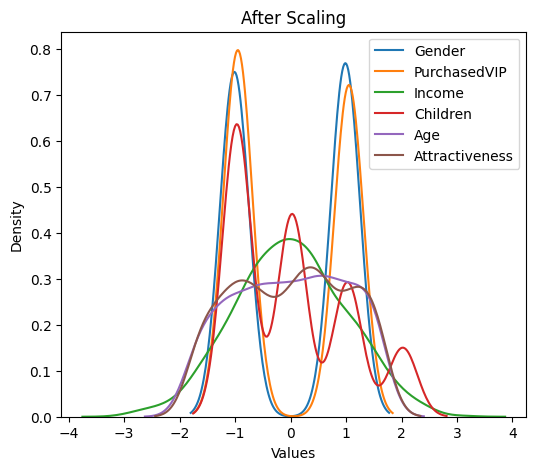

In [58]:
plt.figure(figsize=(6, 5))
plt.title('After Scaling')
plt.xlabel('Values')
for col in x_train.columns:
    sns.kdeplot(x_train[col], label=col)
plt.legend()
plt.show()

<b>we done all the steps ,now our features are ready to fit in the models 😜

<a id="8"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🤖 Create & Train Model</p>

In [59]:
# Function to evaluate models with features and target
def models_score(models, x_train, x_test, y_train, y_test):
    scores = {}

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)  # Calculate RMSE

        scores[name] = {
            'R2 Score': r2,
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse
        }

        # Printing the model name and evaluation metrics
        print("Model name:", name)
        print("R2 Score:", r2)
        print("MSE:", mse)
        print("MAE:", mae)
        print("RMSE:", rmse)
        print("\n<<<<------------------------------------------------------------->>>>\n")

    # Create a DataFrame from the scores dictionary
    model_scores = pd.DataFrame(scores).transpose()
    model_scores = model_scores.sort_values('R2 Score', ascending=False)

    return model_scores

In [60]:
#initialize the models
models = {"LinearRegression":LinearRegression(),
          "AdaBoost":AdaBoostRegressor(),
          "GradiantBoost":GradientBoostingRegressor(),
         "RandomForest":RandomForestRegressor(),
         "XgBoost": XGBRegressor(),
         "KNeighborsRegressor":KNeighborsRegressor(),
         "DecisionTree":DecisionTreeRegressor()}

<a id="9"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🧮 Models Score</p>

In [61]:
# Call the function to evaluate models
scores = models_score(models, x_train, x_test, y_train, y_test)

Model name: LinearRegression
R2 Score: 0.8097536666224447
MSE: 518.3432574571533
MAE: 18.882676848899948
RMSE: 22.76715303803164

<<<<------------------------------------------------------------->>>>

Model name: AdaBoost
R2 Score: 0.9915392449061039
MSE: 23.05208872127832
MAE: 2.9499211783313597
RMSE: 4.801259076667111

<<<<------------------------------------------------------------->>>>

Model name: GradiantBoost
R2 Score: 0.9999999982573128
MSE: 4.748108100669259e-06
MAE: 0.0016584262993790957
RMSE: 0.002179015397070259

<<<<------------------------------------------------------------->>>>

Model name: RandomForest
R2 Score: 1.0
MSE: 0.0
MAE: 0.0
RMSE: 0.0

<<<<------------------------------------------------------------->>>>

Model name: XgBoost
R2 Score: 1.0
MSE: 3.700011852458829e-09
MAE: 4.561455352813937e-05
RMSE: 6.0827722729515604e-05

<<<<------------------------------------------------------------->>>>

Model name: KNeighborsRegressor
R2 Score: 0.9889377851346441
MSE: 30.1

In [62]:
# Prepare the DataFrame for visualization
model_scores = scores.reset_index().rename({"index": "Algorithms"}, axis=1)

In [63]:
model_scores

,Algorithms,R2 Score,MSE,MAE,RMSE
0,DecisionTree,1.000000,0.000000e+00,0.000000,0.000000
1,XgBoost,1.000000,3.700012e-09,0.000046,0.000061
2,RandomForest,1.000000,0.000000e+00,0.000000,0.000000
3,GradiantBoost,1.000000,4.748108e-06,0.001658,0.002179
4,AdaBoost,0.991539,2.305209e+01,2.949921,4.801259
5,KNeighborsRegressor,0.988938,3.014000e+01,3.230000,5.489991
6,LinearRegression,0.809754,5.183433e+02,18.882677,22.767153


<a id="10"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📊 Visualize Model Score</p>

In [64]:
model_scores_r2 = model_scores.iloc[:,0:2]

In [65]:
model_scores_r2.style.bar()

,Algorithms,R2 Score
0,DecisionTree,1.000000
1,XgBoost,1.000000
2,RandomForest,1.000000
3,GradiantBoost,1.000000
4,AdaBoost,0.991539
5,KNeighborsRegressor,0.988938
6,LinearRegression,0.809754


In [66]:
# Visualize the R2 Score
fig_r2 = px.bar(data_frame=model_scores,
                x="Algorithms",
                y="R2 Score",
                color="Algorithms",
                title="<b>Models R2 Score</b>",
                template='plotly_dark')

fig_r2.update_layout(bargap=0.2)
fig_r2.show()

In [67]:
label = model_scores['Algorithms']
value = model_scores['R2 Score']

fig = go.Figure(data=[go.Pie(labels = label, values = value, rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15)

fig.show()

<a id=""></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🌈Thank you 🎃 Happy kaggling</p>